# <center> Vigilancia en salud pública de las violencias de género </center>

## Autores
- Christian Camilo Murillo Anzola
- Venus Celeste Puertas Gualtero

## Reporte No 1. Propuesta del proyecto

## Asesor Principal

Álvaro Montenegro, Campo Elias Pardo Turriago

## Introducción

La identificación de las violencias basadas en género es una gran herramienta para su prevención y tratamiento. En este orden de ideas la alcaldía de Medellín dispone de una base de datos con el registro de pacientes atendidos en las Instituciones Prestadoras de Servicios de Salud con diagnóstico sospechoso de vigilancia en salud pública de las violencias de género. El análisis de información disponible en esta base de datos puede conducirnos a determinar los modos de violencia predominantes y las variables que permiten identificar qué personas son más propensas a sufrir algún modo de violencia

## Descripción del problema

Esta base se manejó anteriormente para un poster, el cual se presentó en el simposio de estadística, en ese momento se analizó desde un enfoque bayesiano. Se optó por tener como variable de respuesta Modo de violencia, la cual tiene 4 categorías estas variables son Violencia Física, Abuso sexual, Violencia Psicológica y otros tipos de violencia, teniendo como variable de referencia, violencia física.  Por esta razón se escogió un modelo logístico multinomial. El objetivo inicial era poder determinar cuál de estos modos de violencia es más predominante en las diferentes comunas de Medellín, además de hacer un modelo de clasificación y poder determinar con las covariables qué tipo de personas es más propensa a sufrir un modo de violencia en la ciudad. 
Este proceso se hizo utilizando R, principalmente una librería llamada UPG, El paquete se basa en una serie de algoritmos a través de métodos de refuerzo MCMC, aunque la librería es bastante fácil de utilizar  limita el manejo del modelo, el primer inconveniente es que no se puede manipular la distribución a priori, permite modificar algunos parámetros, las cadenas de Márkov se visualizan, pero solo eso, además de esto se vuelve muy pesada las iteraciones por esta razón obtener la convergencia se necesita un servidor.  Por lo pesado que se vuelve no fue posible obtener predicciones, ya que el servidor no tenía el suficiente espacio de memoria. También tocó reducir las variables entonces no se analizaron las comunas si no que se unifico por zonas. 
Al tener variables categóricas, se tienen muchas variables de referencia, entonces la interpretación se hace algo compleja, no se pudo sacar un gráfico en el cual se evidenciará el modo de violencia físico ya que estaba como referencia. Al generar la regresión algunas zonas no fueron significativas, entonces no pudimos concluir nada al respecto, solo decir que estas variables no explican el modo de violencia en esas zonas, pero me gustaría encontrar una forma de poder darle explicación a todas las comunas. 

## Fuentes de datos

Los datos tienen 56948 observaciones con 16 variables. 
[Vigilancia en salud pública de las violencias de género](http://medata.gov.co/dataset/vigilancia-en-salud-p%C3%BAblica-de-las-violencias-de-g%C3%A9nero/resource/ac423172-1f60-46eb-ac63#{})

## Procesamiento ETL

### Carga de librerías y datos

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import operator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
cols=['semana','edad_','sexo_','comuna', 'tipo_ss_', 'fec_con_','ini_sin_','tip_cas_','pac_hos_','mod_viol','year_' ]
df=pd.read_csv("/content/drive/MyDrive/Proyecto Diplomado/sivigila_violencia.csv",delimiter=';',usecols=cols)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,semana,edad_,sexo_,comuna,tipo_ss_,fec_con_,ini_sin_,tip_cas_,pac_hos_,mod_viol,year_
0,16,47,M,San Javier,S,20/12/2012,20/11/2012,4,2,3,2013
1,29,14,F,Villa Hermosa,S,8/07/2013,8/07/2013,4,1,4,2013
2,30,8,M,Doce de Octubre,C,21/07/2013,21/07/2013,4,2,3,2013
3,23,7,M,SIN INFORMACION,C,24/05/2013,24/05/2013,4,2,3,2013
4,29,13,M,SIN INFORMACION,C,29/06/2013,26/06/2013,4,1,3,2013


### Limpieza de base de datos

In [ ]:
df["comuna"] = (df['comuna']
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ]","", regex=True)
                            .str.replace(" +"," ", regex=True)
                            .str.strip()
                            .str.title()
                           ) 
df.ini_sin_=pd.to_datetime(df.ini_sin_)
df.fec_con_=pd.to_datetime(df.fec_con_)
messin=list(map(int,df['ini_sin_'].dt.strftime('%m')))
diasin=list(map(int,df['ini_sin_'].dt.strftime('%d')))
df['sem_sin']=list(map(operator.mul, messin, diasin))
df['sem_sin']=df['sem_sin']//7

En R se procesan las variables tipo de regimen, hospitalización, modelo de violencia y tipo de caso. 

## Exploración de los datos

Se conservan las variables
- Semana (semana de consulta)
- Edad (categórica): Primera infancia (0-5), infancia (6-11), adolescencia (12-17), juventud(14,28), adultez(29,59), adulto mayor(>60)
- Sexo
- Comuna (16 comunas)
- ¿Corregimientos?
- Tipo de regimen de seguridad social (contributivo, subsidiado, otros)
- Codigo de la aseguradora (Diferentes aseguradoras)
- Fecha de inicio de síntomas (convertirlo a semanas)
- Tipo de caso (Sospechoso, probable, confirmado)
- Hospitalización
- Modo de violencia (Física, psicológica, sexual (abuso sexual, acoso sexual, violación, trata de personas, otros actos sexuales), Infancia,adolescencia,vejez(Negligencia y abandono, explotación sexual en niños y adolescencia)) **Importante hacer limpieza de esta variable**
- Año

## Análisis descriptivo

### Tipo de Régimen

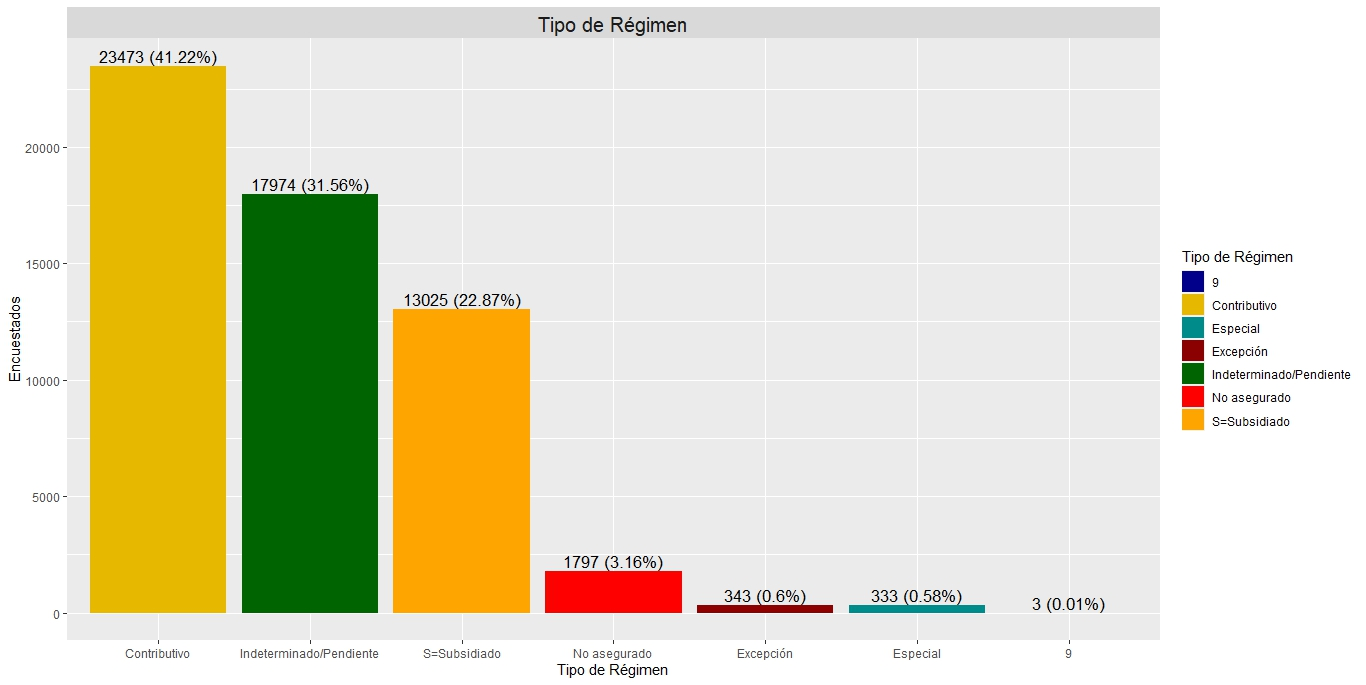

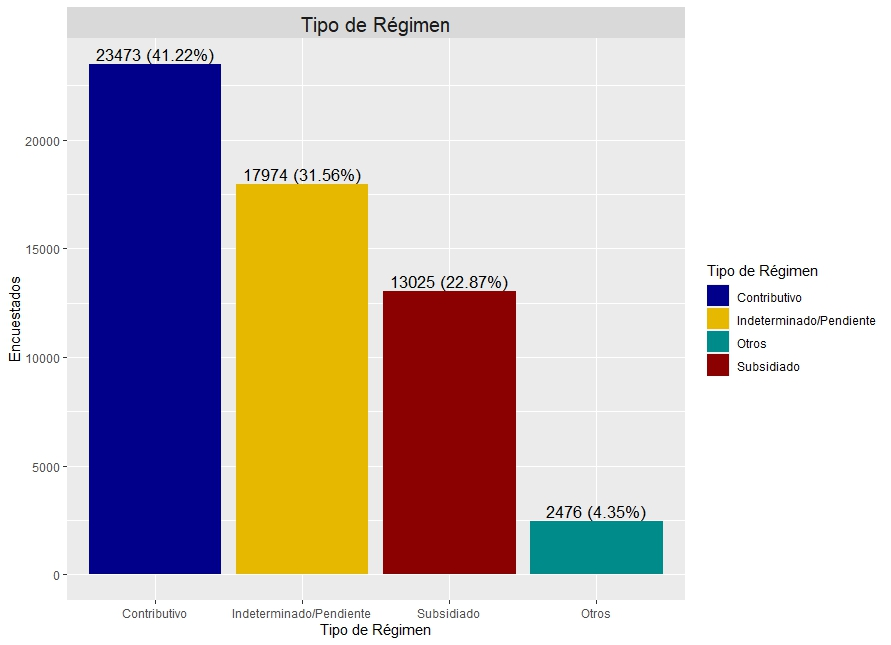

### Hospitalización

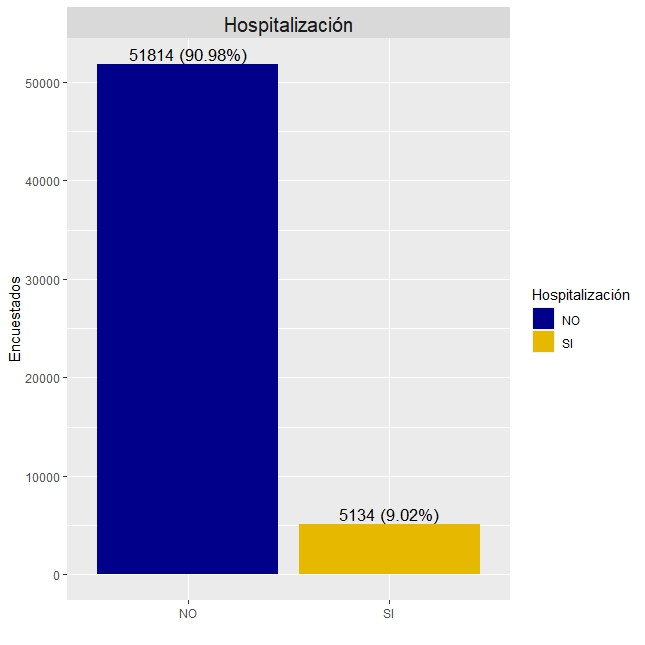

### Modelo de violencia

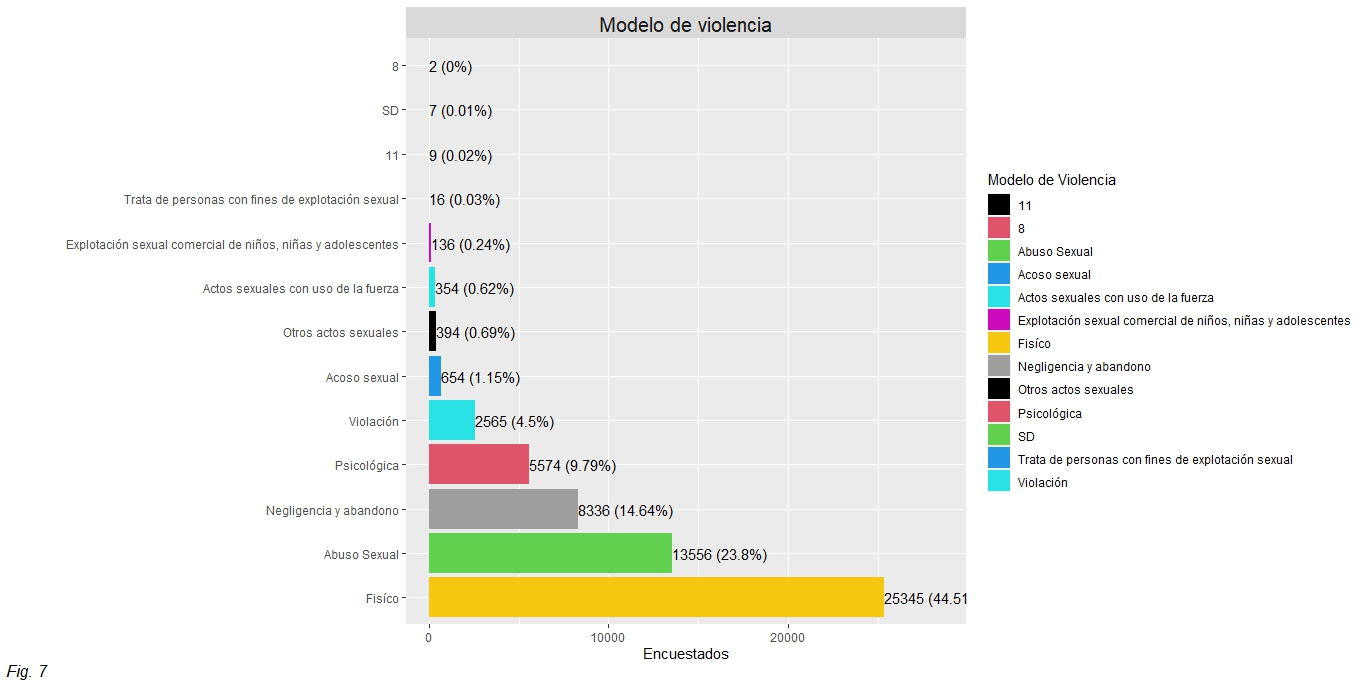

Modelo de Violencia Agrupadas 

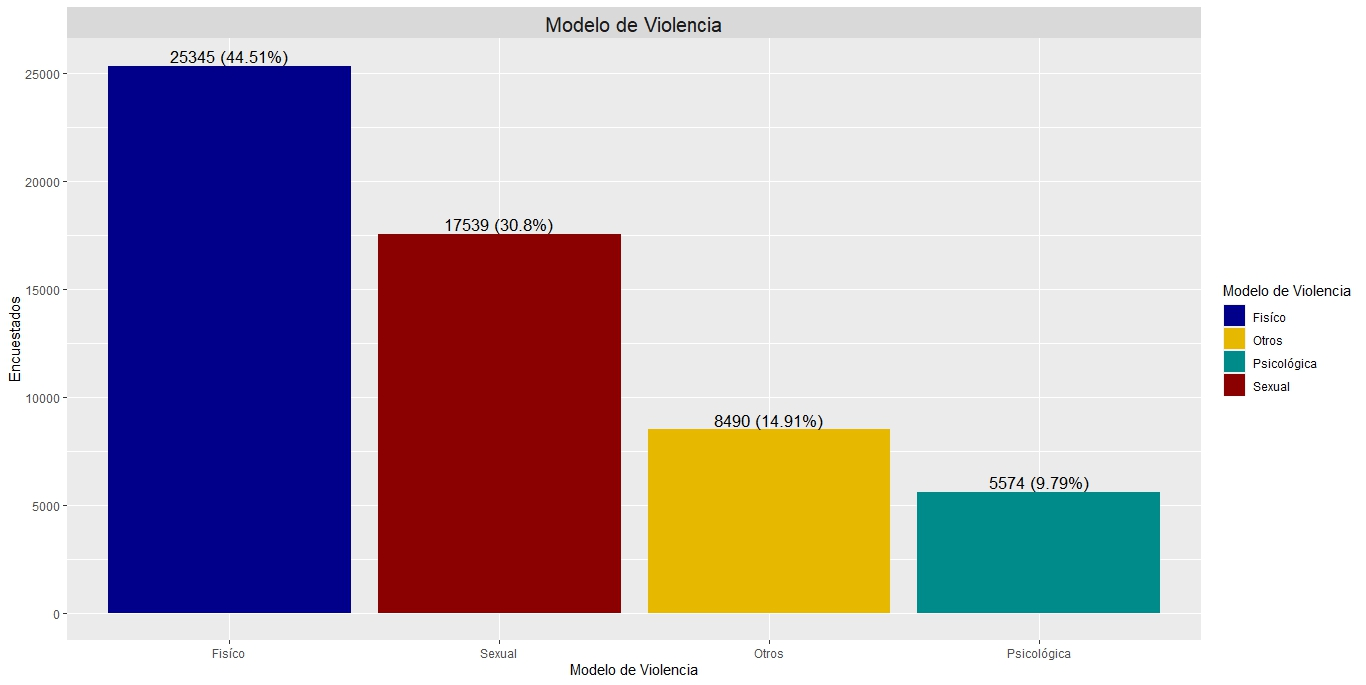

### Tipo de caso


|1= Sospechoso| 2= Probable | 4= Confirmado por clinica|
|-------------|-------------|--------------------------|
|56933        |     5       |                     10   |

### Distribución por sexo

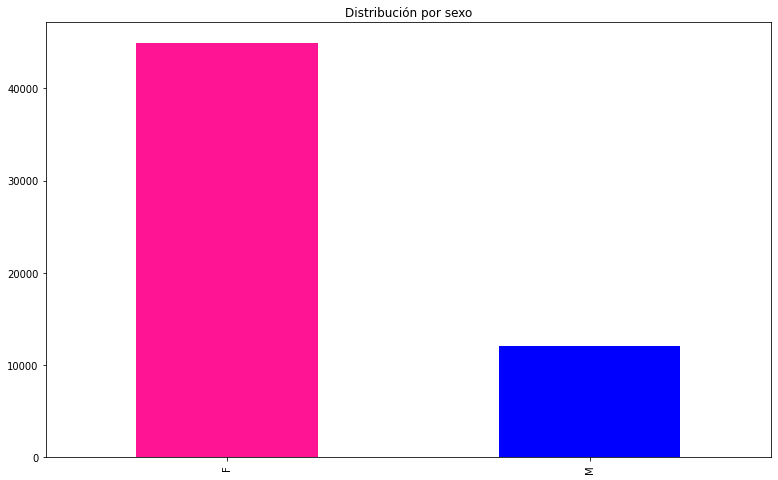

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]
plot = df['sexo_'].value_counts().plot(kind='bar',
                                            title='Distribución por sexo', color=['deeppink','blue'] )

### Distribución por comuna

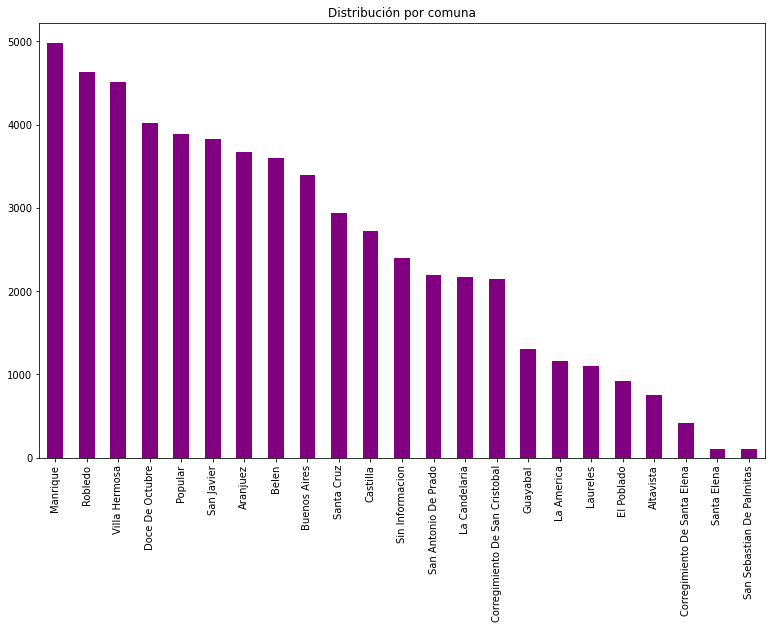

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]
plot = df['comuna'].value_counts().plot(kind='bar',
                                            title='Distribución por comuna', color='purple' )

### Distribución semana de consulta según año

Text(0.5, 6.79999999999999, 'Semana del inicio de consulta')

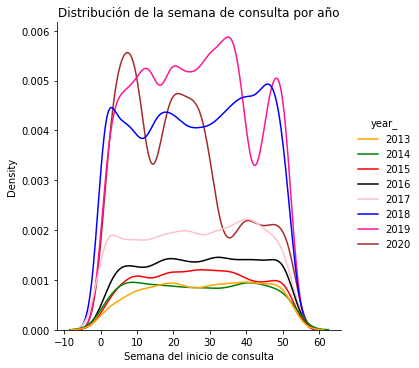

In [ ]:

consulta=sns.displot(data=df, x='semana',kind='kde',hue='year_',palette=['orange','green','red','black','pink','blue','deeppink','brown'])
plt.title("Distribución de la semana de consulta por año")
plt.xlabel('Semana del inicio de consulta')

### Distribución semana inicio de síntomas por año

Text(0.5, 6.79999999999999, 'Semana del inicio de síntomas')

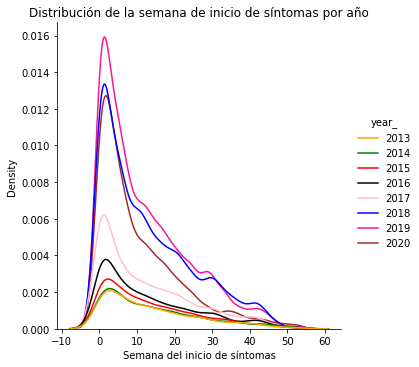

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]
consulta=sns.displot(data=df, x='sem_sin',kind='kde',hue='year_',palette=['orange','green','red','black','pink','blue','deeppink','brown'])
plt.title("Distribución de la semana de inicio de síntomas por año")
plt.xlabel('Semana del inicio de síntomas')

## Técnicas de modelación propuestas

Análisis de correspondencia multiple

## Conocimientos requeridos para el desarrollo del proyecto


- Programación Python: Medio
- Programación R: Medio
- Maquinas de soporte vectorial
- Manejo de redes neuronales

## Resultados Esperados

- Determinar que variables son importantes para aplicar un modelo de clasificación. 

- Determinar cuál de estos modos de violencia (física, psicológica, abuso sexual y otros tipos) es más predominante en las diferentes comunas de Medellín.

- Hacer un modelo de clasificación y poder determinar con las covariables qué tipo de personas es más propensa a sufrir un modo de violencia en las comunas. 

## Tiempo de desarrollo esperado

6 semanas
